In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np

In [ ]:
# color definition
grey = [.5, .5, .5]
bg = [40/255, 40/255, 50/255]
yel = [.7, .7, .3]
bl = [.6, .6, 1]
rd = [1, .6, .6]

In [ ]:
# custom-set the default background
plt.rcParams.update({'figure.facecolor': bg})
plt.rcParams.update({'axes.facecolor': bg})

In [ ]:
def plot_vector(origin, dx, dy, axes, color, alpha = 1):
  (x, y) = origin
  axes.quiver(x, y, dx, dy, 
          angles='xy', 
          scale_units='xy', 
          scale=1, color=color, alpha = alpha)

In [ ]:
A = np.array([[4, 0], [1, 2]])
l, v = np.linalg.eig(A)
v1 = v[:,0]; v2 = v[:,1]

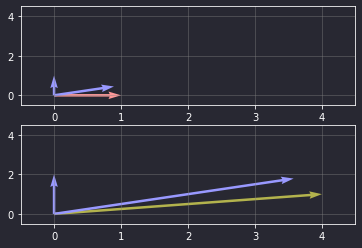

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.grid(True, color = grey, alpha = 0.5)
ax1.set_xlim(-0.5, 4.5)
ax1.set_ylim(-0.5, 4.5)

#plotting the vectors
origin = (0, 0)
# just a vector
plot_vector(origin, 1, 0, ax1, rd)
# eig
plot_vector(origin, v1[0], v1[1], ax1, bl)
plot_vector(origin, v2[0], v2[1], ax1, bl)

ax2.grid(True, color = grey, alpha = 0.5)
ax2.set_xlim(-0.5, 4.5)
ax2.set_ylim(-0.5, 4.5)
# transformed "just a vector"
plot_vector(origin, 4, 1, ax2, yel)
# transformed eig
plot_vector(origin, l[0]*v1[0], l[0]*v1[1], ax2, bl)
plot_vector(origin, l[1]*v2[0], l[1]*v2[1], ax2, bl)

fig.get_figure()

In [ ]:
white = np.random.multivariate_normal(np.array([0,0]),
                                     np.eye(2),
                                     500)
# scaling matrix
scale = np.array([[2,0], [0,1/2]])
# rotation matrix, theta = 45 deg
theta = 5*np.pi/12
c, s = np.cos(theta), np.sin(theta)
rotate = np.array([[c, -s], [s, c]])
# R^{-1}
rot_inv = np.linalg.inv(rotate)
# Sigma = RSSR^{-1}
cov = rotate @ (scale**2 @ rot_inv)

In [ ]:
SD = scale @ white.T
RSD = rotate @ (scale @ white.T)

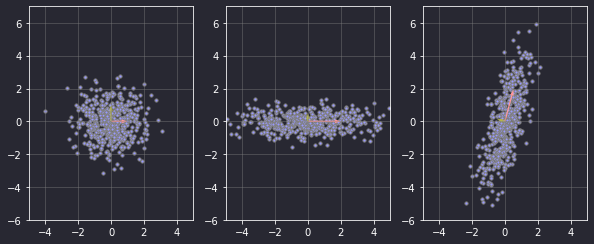

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plt.setp(fig,
         size_inches = (10, 12))
origin = (0, 0)

# white
ax1.scatter(white[:,0], white[:,1], s=10,
           color=bl, edgecolor = grey)
plot_vector(origin, 1, 0, ax1, rd)
plot_vector(origin, 0, 1, ax1, yel)

ax1.grid(True, color = grey, alpha = 0.5)
ax1.set_aspect('equal')
ax1.set_xlim(-5, 5)
ax1.set_ylim(-6, 7)

# scaled white
ax2.scatter(SD[0,:], SD[1,:], s=10,
           color=bl, edgecolor = grey)
plot_vector(origin, 2, 0, ax2, rd)
plot_vector(origin, 0, 0.5, ax2, yel)

ax2.grid(True, color = grey, alpha = 0.5)
ax2.set_aspect('equal')
ax2.set_xlim(-5, 5)
ax2.set_ylim(-6, 7)

# after transformation
new_basis = rotate @ scale

ax3.scatter(RSD[0,:], RSD[1,:], s=10,
           color=bl, edgecolor = grey)
plot_vector(origin, 
            new_basis[0,0],
            new_basis[1,0], 
            ax3, rd)
plot_vector(origin,
            new_basis[0,1],
            new_basis[1,1],
            ax3, yel)

ax3.grid(True, color = grey, alpha = 0.5)
ax3.set_aspect('equal')
ax3.set_xlim(-5, 5)
ax3.set_ylim(-6, 7)

fig.get_figure()

In [ ]:
data = np.random.multivariate_normal([1,1],
                                     np.array([[4,1],[1,2]]),
                                     50)
np.cov(data.T)

array([[4.76730856, 1.3756246 ],
       [1.3756246 , 2.27769847]])

In [ ]:
# standardization
data[:,0] = (data[:,0] - np.mean(data[:,0]))/np.std(data[:,0])
data[:,1] = (data[:,1] - np.mean(data[:,1]))/np.std(data[:,1])

np.cov(data.T)

array([[1.02040816, 0.40689618],
       [0.40689618, 1.02040816]])